<a href="https://colab.research.google.com/github/Viny2030/polars/blob/main/IIThe_Polar_Express_Cheatsheet___polars_%F0%9F%90%BB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Polars](https://www.pola.rs/) Cheat Sheet

[![Polars cheat sheet: download as PDF](https://img.shields.io/badge/Polars%20cheat%20sheet-Download%20as%20PDF-green)](https://franzdiebold.github.io/polars-cheat-sheet/Polars_cheat_sheet.pdf)

Most examples were taken from the official [Polars user guide](https://pola-rs.github.io/polars-book/user-guide/).

By Franz Diebold ([diebold.io](https://www.diebold.io)), inspired by [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

https://github.com/c-peters


https://github.com/ritchie46

### Install

In [ ]:
!pip install polars

### Import

In [ ]:
import polars as pl

### Creating/reading DataFrames

In [ ]:
# Create DataFrame
df = pl.DataFrame(
    {
        "nrs": [1, 2, 3, None, 5],
        "names": ["foo", "ham", "spam", "egg", None],
        "random": [0.3, 0.7, 0.1, 0.9, 0.6],
        "groups": ["A", "A", "B", "C", "B"],
    }
)

In [ ]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [ ]:


# Read CSV using the raw data URL
df1 = pl.read_csv("https://raw.githubusercontent.com/VINY1958/datasets/main/iris.csv", has_header=True)

In [ ]:
df1

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Virginica"""
6.3,2.5,5.0,1.9,"""Virginica"""
6.5,3.0,5.2,2.0,"""Virginica"""


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##lectura 32

con la api lazy polars no ejecuta la consulta linea por linea, api lazy permite aplicar optimizador de consulta
conjunto de datos mas grandes de la memoria
puede ayudarnos a optimizar los resultados

In [ ]:
df1 = pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')

In [ ]:
df1.select()

In [ ]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .with_columns(
      pl.col('AIR_TIME')/ 60
    )
    .filter(pl.col('MONTH')> 10)

)

In [ ]:
query

In [ ]:
query.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,11,1,7,"""NK""",612,"""N602NK""","""LAS""","""MSP""",5,7,2,17,24,177,177,2.566667,1299,358,6,402,404,2,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",680,"""N76516""","""SFO""","""ORD""",14,19,5,15,34,258,231,3.516667,1846,505,5,532,510,-22,0,0,null,null,null,null,null,null
2015,11,1,7,"""AA""",260,"""N3KTAA""","""LAX""","""MIA""",15,6,-9,30,36,296,313,4.5,2342,706,13,711,719,8,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",910,"""N76503""","""LAX""","""ORD""",31,27,-4,14,41,248,231,3.516667,1744,512,6,539,518,-21,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",1888,null,"""LAS""","""IAH""",41,null,null,null,null,172,null,null,1222,null,null,433,null,null,0,1,"""A""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,4.533333,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,3.25,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,3.283333,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


###forma alternativa de acceder a la api lazy de polars

In [ ]:
df2 = pl.DataFrame(
  {
        'id':[1,2,3],
        'nombre':['Rosa','Jose','Pedro']
    }

)

In [ ]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [ ]:
df2_lazy = df2.lazy()

In [ ]:
print(df2_lazy) ## la consulta del lazy frame establece los nombres de las columnas y los tipos de datos

naive plan: (run LazyFrame.explain(optimized=True) to see the optimized plan)

DF ["id", "nombre"]; PROJECT */2 COLUMNS; SELECTION: None


In [ ]:
df2_lazy.explain(optimized=True)

'DF ["id", "nombre"]; PROJECT */2 COLUMNS; SELECTION: None'

In [ ]:
df2_lazy

##podemos ver el dataframe lazy con el metodo schema, .schema
comprobacion de los tipos de datos del lazy frame
en la api lazy polars comprobara el dataframe antes de comprobar los datos
la verificacion se realiza al verificar la consulta lazy

In [ ]:
df2.schema

Schema([('id', Int64), ('nombre', String)])

In [ ]:
df2_lazy.schema

<ipython-input-20-a3c065f6a69b>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df2_lazy.schema


Schema([('id', Int64), ('nombre', String)])

In [ ]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [ ]:
df2_lazy.with_columns(pl.col('id').round(0)).collect()

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


en la api lazy se debe conocer el esquema el optimizador de consulta podra inferir , si el esquema no se conoce de antemano no se hace , ejemplo pivot
pivot NO ESTA DISPOPNIBLE EN API lazy

ejecutar el pipeline en modo lazy
ejecutar el pipeline con .collect
hacer la operacion que no sea lazy en el dataframe
Convertir la salida nuevamente en a unlazy Frame y continuar en modo lazy

In [ ]:
df3 = pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')
df3

In [ ]:
df3.collect().head(3)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"


lazy_eager_query =(
    pl.scan_parquet('/content/vuelos.parquet')
    .with_columns(pl.col('AIR_TIME')/ 60)
.collect()
.pivot(
        index='AIRLINE',columns='MONTH', values='AIR_TIME',aggfunc='mean'
)

.lazy()
    .filter(pl.col('AIRLINE')=='AA')
    .collect()
    )

In [ ]:
df3.columns

<ipython-input-25-5354ac78f1f0>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df3.columns


['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [ ]:
lazy_eager_query =(
    pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')
    .with_columns(pl.col('views')> 100000)
.collect()
.pivot(
        index='video_id',columns='likes', values='likes',aggregate_function='mean'
))

<ipython-input-26-b91b887ff27b>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('/content/drive/MyDrive/polars/seccion03/dataCSV.csv')


In [ ]:
lazy_eager_query

video_id,57527,97185,146033,10172,132235,9763,15993,23663,3543,12654,655,1576,114188,7848,7473,9419,8011,5398,11963,8421,9586,3585,11758,1707,4884,8676,4687,9033,156,715,4035,119,787419,3781,1661,2486,…,56557,455949,181069,90500,15128,77408,230427,140462,75642,162795,105783,41623,634770,518106,28479,6583,50919,835657,129865,46673,20248,48889,196635,19930,189265,109945,266267,628861,210802,45128,676467,645888,38160,60008,48068,192957,357079
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2kyS6SvSYSE""",57527.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""1ZAPwfrtAFY""",null,97185.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""5qpjK5DgCt4""",null,null,146033.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""puqaWrEC7tY""",null,null,null,10172.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""d380meD0W0M""",null,null,null,null,132235.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""dS5Thrl-4Kc""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""JGm9Y_hFqNk""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""6h8QgZF5Qu4""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [ ]:
df3.collect()

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""puqaWrEC7tY""","""17.14.11""","""Nickelback Lyrics: Real or Fak…","""Good Mythical Morning""",24,"""2017-11-13T11:00:04.000Z""","""rhett and link|gmm|good mythic…",343168,10172,666,2146,"""https://i.ytimg.com/vi/puqaWrE…",false,false,false,"""Today we find out if Link is a…"
"""d380meD0W0M""","""17.14.11""","""I Dare You: GOING BALD!?""","""nigahiga""",24,"""2017-11-12T18:01:41.000Z""","""ryan|higa|higatv|nigahiga|i da…",2095731,132235,1989,17518,"""https://i.ytimg.com/vi/d380meD…",false,false,false,"""I know it's been a while since…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""BZt0qjTWNhw""","""18.14.06""","""The Cat Who Caught the Laser""","""AaronsAnimals""",15,"""2018-05-18T13:00:04.000Z""","""aarons animals|aarons|animals|…",1685609,38160,1385,2657,"""https://i.ytimg.com/vi/BZt0qjT…",false,false,false,"""The Cat Who Caught the Laser -…"
"""1h7KV2sjUWY""","""18.14.06""","""True Facts : Ant Mutualism""","""zefrank1""",22,"""2018-05-18T01:00:06.000Z""","""[none]""",1064798,60008,382,3936,"""https://i.ytimg.com/vi/1h7KV2s…",false,false,false,""""""
"""D6Oy4LfoqsU""","""18.14.06""","""I GAVE SAFIYA NYGAARD A PERFEC…","""Brad Mondo""",24,"""2018-05-18T17:34:22.000Z""","""I gave safiya nygaard a perfec…",1066451,48068,1032,3992,"""https://i.ytimg.com/vi/D6Oy4Lf…",false,false,false,"""I had so much fun transforming…"


### filtro desastrosos jajajaja

In [ ]:
df3.lazy()\
    .filter(pl.col('channel_title')=='Rudy Mancuso')\
    .collect()

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""5qpjK5DgCt4""","""17.14.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",3191434,146033,5339,8181,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.15.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4326684,167696,6730,9265,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.16.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4576001,172379,6952,9440,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.17.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4737269,175762,7017,9557,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
"""5qpjK5DgCt4""","""17.18.11""","""Racist Superman | Rudy Mancuso…","""Rudy Mancuso""",23,"""2017-11-12T19:05:24.000Z""","""racist superman|rudy|mancuso|k…",4949674,180201,7042,9687,"""https://i.ytimg.com/vi/5qpjK5D…",false,false,false,"""WATCH MY PREVIOUS VIDEO ▶ \n\n…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""oLDbO545aKQ""","""18.10.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3756259,195392,4479,11143,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"
"""oLDbO545aKQ""","""18.11.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3766328,195543,4483,11157,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"
"""oLDbO545aKQ""","""18.12.06""","""Terrible Magicians | Rudy Manc…","""Rudy Mancuso""",10,"""2018-05-21T21:00:33.000Z""","""terrible magicians|rudy|mancus…",3787506,195963,4492,11180,"""https://i.ytimg.com/vi/oLDbO54…",false,false,false,"""WATCH MORE ▶ https://youtu.be/…"


### LECTURA 33

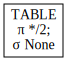

In [ ]:
df2_lazy.show_graph(optimized=True)

###se lee de abajo hacia arriba, ejemplor cada rectangulo correponde a una etapa del plan de consulta
el simbolo,sigma significa a seleccion
el simbolo pi proyeccion de un conjunto de columnas

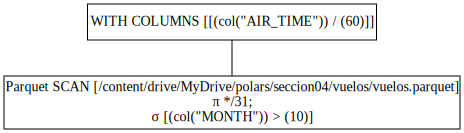

In [ ]:
query.show_graph()

# **alternativa de visualizacion del plan de consulta**

In [ ]:
query

In [ ]:
query.explain(optimized=True)

' WITH_COLUMNS:\n [[(col("AIR_TIME")) / (60)]] \n  Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n  PROJECT */31 COLUMNS\n  SELECTION: [(col("MONTH")) > (10)]'

In [ ]:
query.explain(optimized=False)

'FILTER [(col("MONTH")) > (10)] FROM\n   WITH_COLUMNS:\n   [[(col("AIR_TIME")) / (60)]] \n    Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n    PROJECT */31 COLUMNS'

In [ ]:
query.explain()

' WITH_COLUMNS:\n [[(col("AIR_TIME")) / (60)]] \n  Parquet SCAN [/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet]\n  PROJECT */31 COLUMNS\n  SELECTION: [(col("MONTH")) > (10)]'

##nos brinda el mejor resultado posible

In [ ]:
query.collect()## consulta en el dataset completo 2,4 que coinciden con el resultado

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,11,1,7,"""NK""",612,"""N602NK""","""LAS""","""MSP""",5,7,2,17,24,177,177,2.566667,1299,358,6,402,404,2,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",680,"""N76516""","""SFO""","""ORD""",14,19,5,15,34,258,231,3.516667,1846,505,5,532,510,-22,0,0,null,null,null,null,null,null
2015,11,1,7,"""AA""",260,"""N3KTAA""","""LAX""","""MIA""",15,6,-9,30,36,296,313,4.5,2342,706,13,711,719,8,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",910,"""N76503""","""LAX""","""ORD""",31,27,-4,14,41,248,231,3.516667,1744,512,6,539,518,-21,0,0,null,null,null,null,null,null
2015,11,1,7,"""UA""",1888,null,"""LAS""","""IAH""",41,null,null,null,null,172,null,null,1222,null,null,433,null,null,0,1,"""A""",null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,4.533333,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,3.25,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,3.283333,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


los lazy frame son planes de consulta una promesa de calculo, utilicemos despues se va a calcular de nuevo en ese plan de consulta
si se necesita mas memoria de la que se necesita se aplica el modo streaming=True habilitamos ese modo
LA API LAZY no cuenta cuantas columnas hay en cada etapa de la consulta

In [ ]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .filter(pl.col('AIR_TIME')>100)
)
query.fetch(n_rows=20)  ## 20 filas de esta consulta

<ipython-input-37-b18d1a6b52aa>:5: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query.fetch(n_rows=20)  ## 20 filas de esta consulta


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,1,1,4,"""AS""",108,"""N309AS""","""ANC""","""SEA""",45,41,-4,17,58,204,194,173,1448,451,4,509,455,-14,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",1560,"""N3743H""","""ANC""","""SEA""",45,31,-14,25,56,210,200,171,1448,447,4,515,451,-24,0,0,null,null,null,null,null,null
2015,1,1,4,"""UA""",1197,"""N78448""","""SFO""","""IAH""",48,42,-6,11,53,218,217,199,1635,612,7,626,619,-7,0,0,null,null,null,null,null,null


## LECTURA 34

LAZY FRAME AGREGACIONES

In [ ]:
import polars as pl
from polars import col

In [ ]:
path = ('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')

In [ ]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [ ]:
df1

In [ ]:
df2

id,nombre
i64,str
1,"""Rosa"""
2,"""Jose"""
3,"""Pedro"""


In [ ]:
df3.collect().head(2)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
str,str,str,str,i64,str,str,i64,i64,i64,i64,str,bool,bool,bool,str
"""2kyS6SvSYSE""","""17.14.11""","""WE WANT TO TALK ABOUT OUR MARR…","""CaseyNeistat""",22,"""2017-11-13T17:13:01.000Z""","""SHANtell martin""",748374,57527,2966,15954,"""https://i.ytimg.com/vi/2kyS6Sv…",false,false,false,"""SHANTELL'S CHANNEL - https://w…"
"""1ZAPwfrtAFY""","""17.14.11""","""The Trump Presidency: Last Wee…","""LastWeekTonight""",24,"""2017-11-13T07:30:00.000Z""","""last week tonight trump presid…",2418783,97185,6146,12703,"""https://i.ytimg.com/vi/1ZAPwfr…",false,false,false,"""One year after the presidentia…"


In [ ]:
df3.columns

<ipython-input-44-5354ac78f1f0>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df3.columns


['video_id',
 'trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description']

In [ ]:
df1.collect().head(3)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null


In [ ]:
df.lazy()

In [ ]:
df1.lazy()

In [ ]:
df2.lazy()

In [ ]:
df3.lazy()

In [ ]:
lf = pl.LazyFrame(
    {
        'id': [1,2,3],
        'nombre':['juan','pedro','maria']
    }
)


In [ ]:
lf

In [ ]:
lf.collect()

id,nombre
i64,str
1,"""juan"""
2,"""pedro"""
3,"""maria"""


In [ ]:
df4 = pl.read_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
df4

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [ ]:
df.columns

['nrs', 'names', 'random', 'groups']

In [ ]:
df5 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'null', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,None], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, None, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,None, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
query = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
    .select(
        col('AIRLINE_DELAY'),
        col('SECURITY_DELAY'),
        col('WEATHER_DELAY'), #Fixed typo in column name
    )
    .null_count()  ### recuento de valores nulos de cada columna
)
query.collect()

AIRLINE_DELAY,SECURITY_DELAY,WEATHER_DELAY
u32,u32,u32
4755640,4755640,4755640


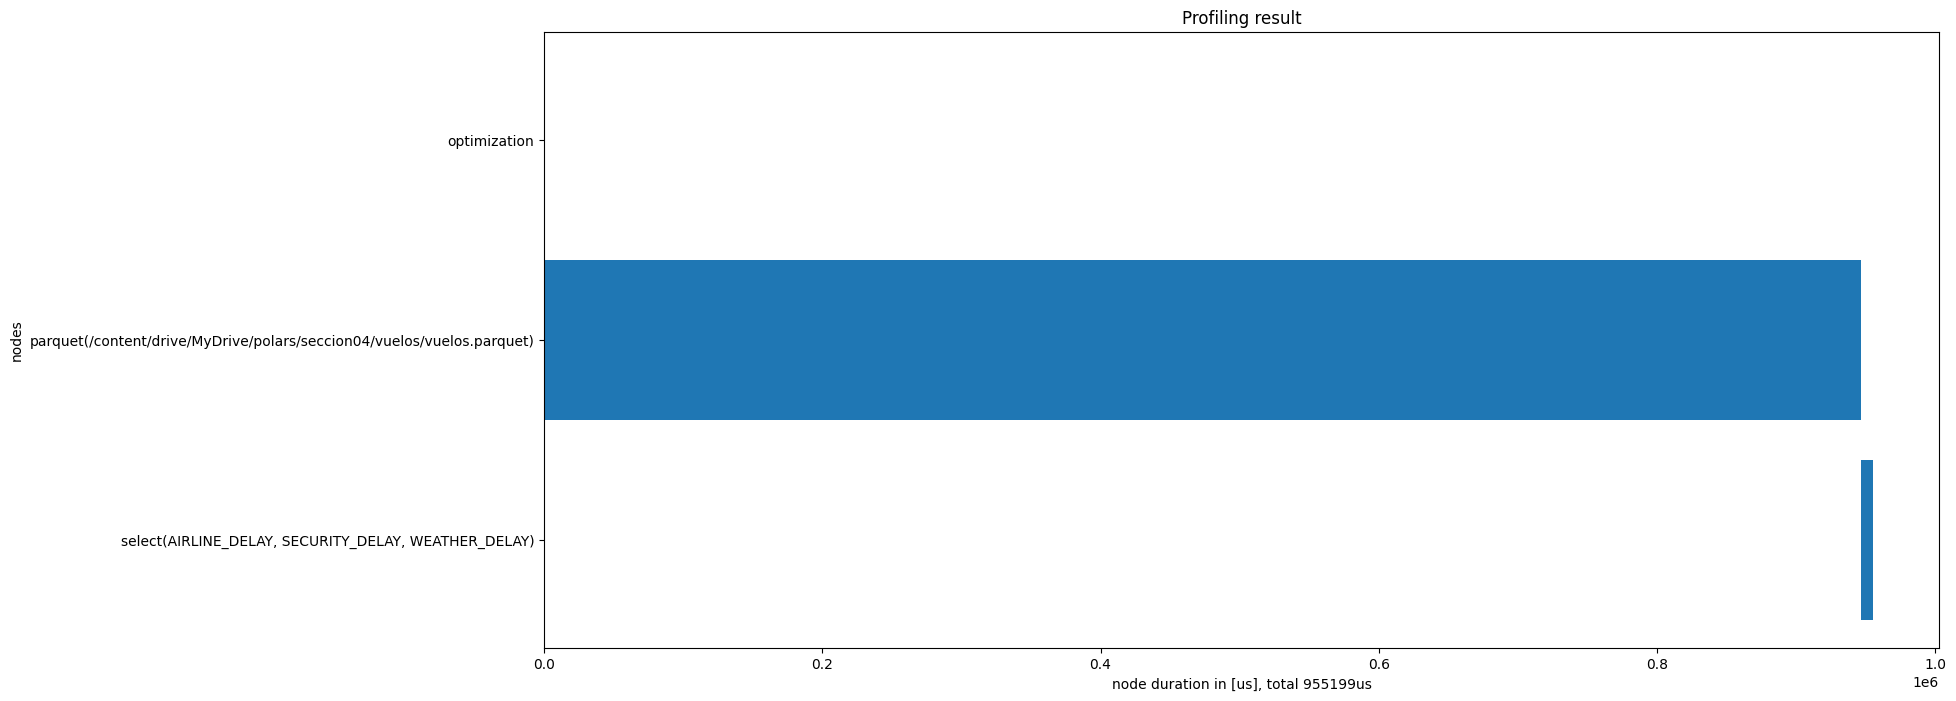

(shape: (1, 3)
 ┌───────────────┬────────────────┬───────────────┐
 │ AIRLINE_DELAY ┆ SECURITY_DELAY ┆ WEATHER_DELAY │
 │ ---           ┆ ---            ┆ ---           │
 │ u32           ┆ u32            ┆ u32           │
 ╞═══════════════╪════════════════╪═══════════════╡
 │ 4755640       ┆ 4755640        ┆ 4755640       │
 └───────────────┴────────────────┴───────────────┘,
 shape: (3, 3)
 ┌─────────────────────────────────┬────────┬────────┐
 │ node                            ┆ start  ┆ end    │
 │ ---                             ┆ ---    ┆ ---    │
 │ str                             ┆ u64    ┆ u64    │
 ╞═════════════════════════════════╪════════╪════════╡
 │ optimization                    ┆ 0      ┆ 84     │
 │ parquet(/content/drive/MyDrive… ┆ 84     ┆ 946638 │
 │ select(AIRLINE_DELAY, SECURITY… ┆ 946664 ┆ 955199 │
 └─────────────────────────────────┴────────┴────────┘)

In [ ]:
query.profile(show_plot=True)  ## mostrar un diagrama de gantt del resultado del perfilado que vamos a tener, cuanto tiempo a tomado y la duracion en microsegundos

In [ ]:
vuelos_lf =(
    pl.scan_parquet(path)
    .select(
     col('AIR_TIME'),
     col('DISTANCE')
)
)
vuelos_lf.sum().collect()  ## suma de los valores de cada columna

AIR_TIME,DISTANCE
i32,i32
648606351,490390113


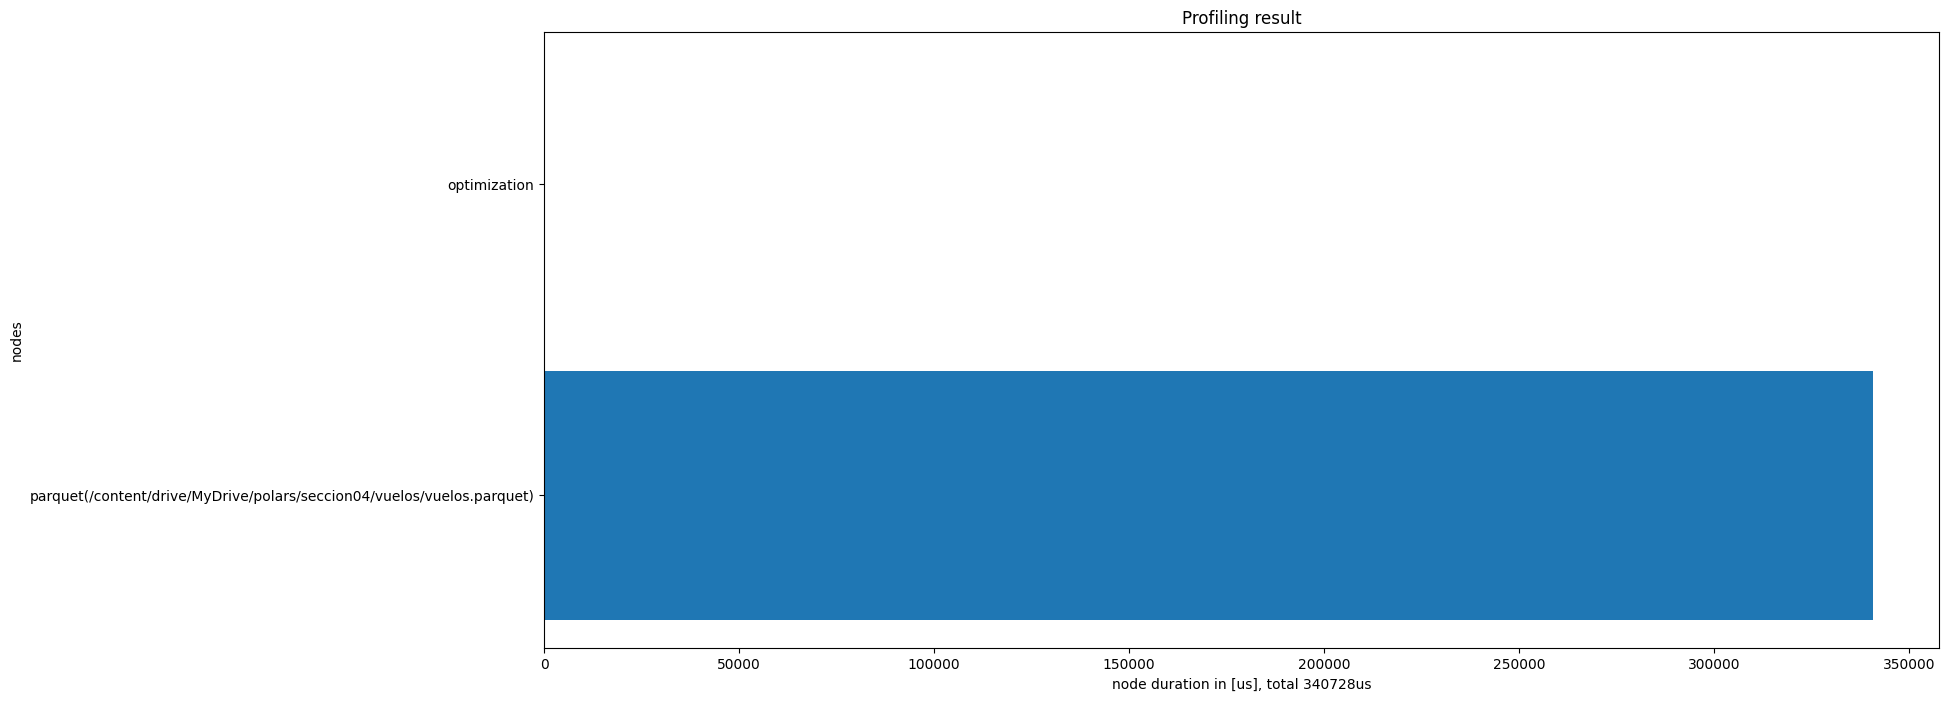

(shape: (5_819_079, 2)
 ┌──────────┬──────────┐
 │ AIR_TIME ┆ DISTANCE │
 │ ---      ┆ ---      │
 │ i32      ┆ i32      │
 ╞══════════╪══════════╡
 │ 169      ┆ 1448     │
 │ 263      ┆ 2330     │
 │ 266      ┆ 2296     │
 │ 258      ┆ 2342     │
 │ 199      ┆ 1448     │
 │ …        ┆ …        │
 │ 272      ┆ 2611     │
 │ 195      ┆ 1617     │
 │ 197      ┆ 1598     │
 │ 144      ┆ 1189     │
 │ 189      ┆ 1576     │
 └──────────┴──────────┘,
 shape: (2, 3)
 ┌─────────────────────────────────┬───────┬────────┐
 │ node                            ┆ start ┆ end    │
 │ ---                             ┆ ---   ┆ ---    │
 │ str                             ┆ u64   ┆ u64    │
 ╞═════════════════════════════════╪═══════╪════════╡
 │ optimization                    ┆ 0     ┆ 6      │
 │ parquet(/content/drive/MyDrive… ┆ 6     ┆ 340728 │
 └─────────────────────────────────┴───────┴────────┘)

In [ ]:
vuelos_lf.profile(show_plot=True)  ## mostrar un diagrama de gantt del resultado del perfilado que vamos a tener, cuanto tiempo a tomado y la duracion en microsegundos

In [ ]:
df5.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""null""",32,null,400
5,"""juana""",33,4000,null
6,"""oscar""",null,5000,500


In [ ]:
df5 = (
    df5 # Using the existing LazyFrame
    .select(
     pl.col('edad'),
     pl.col('aportes')
    )
)
df5.sum().collect()  ## suma de los valores de cada columna

edad,aportes
i64,i64
140,1500


In [ ]:
df5.max().collect()

edad,aportes
i64,i64
33,500


In [ ]:
df5.mean().collect()

edad,aportes
f64,f64
28.0,300.0


In [ ]:
df5.mean().collect()

edad,aportes
f64,f64
28.0,300.0


In [ ]:
vuelos_lf.max().collect()

AIR_TIME,DISTANCE
i32,i32
690,4983


In [ ]:
vuelos_lf.mean().collect()

AIR_TIME,DISTANCE
f64,f64
113.511628,822.356495


In [ ]:
vuelos_lf.min().collect()

AIR_TIME,DISTANCE
i32,i32
7,21


In [ ]:
df5.collect()

edad,aportes
i64,i64
20,100
25,200
30,300
32,400
33,null
null,500


In [ ]:
df5 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'null', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,None], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, None, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,None, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
df5.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""null""",32,null,400
5,"""juana""",33,4000,null
6,"""oscar""",null,5000,500


In [ ]:
df5 = (
    df5 # Using the existing LazyFrame
    .select(
     pl.col('nombre').fill_null(strategy='backward'),
     pl.col('aportes').fill_null(strategy='forward'),
     pl.col('ingreso').fill_null(strategy='mean'),
     pl.col('edad').fill_null(strategy='forward')
    )
)



In [ ]:
df5.collect()

nombre,aportes,ingreso,edad
str,i64,i64,i64
"""Rosa""",100,1000,20
"""Jose""",200,2000,25
"""Pedro""",300,3000,30
"""null""",400,3000,32
"""juana""",400,4000,33
"""oscar""",500,5000,33


In [ ]:
df5.fill_null(strategy='forward').collect()

nombre,aportes,ingreso,edad
str,i64,i64,i64
"""Rosa""",100,1000,20
"""Jose""",200,2000,25
"""Pedro""",300,3000,30
"""null""",400,3000,32
"""juana""",400,4000,33
"""oscar""",500,5000,33


In [ ]:
df5 = df5.select(pl.all().forward_fill())
df5

In [ ]:
for column in df5.columns:
    df5 = df5.with_columns(
        pl.col(column).fill_nan(pl.col(column).mean()).alias(column)
    )

<ipython-input-75-b3430ee7e69e>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  for column in df5.columns:


In [ ]:
df5

In [ ]:
df5.dtypes

<ipython-input-77-d8e0f4b61656>:1: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  df5.dtypes


[String, Float64, Float64, Float64]

##LECTURA 36

In [ ]:
import polars as pl

In [ ]:
vuelos_lf = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
)

In [ ]:
vuelos_lf

In [ ]:
vuelos_lf.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [ ]:
from polars import col

tomamos la variable de vuelos lazyframe, agrupamos por aerolinea, agregaciones una pór una y renombrar nombre de columna

In [ ]:
vuelos_lf.columns

<ipython-input-83-391976007e82>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  vuelos_lf.columns


['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [ ]:
vuelos_lf.group_by('AIRLINE').agg(
    pl.col('AIR_TIME').mean().name.suffix('_MEAN'), ## columna tiempo en el aire y nueva columna y un sufijo
     pl.col('AIR_TIME').count().alias('COUNT_AIR_TIME'),## englobo la agregacion columna tiempo en el aire, conteo y renombrarla
     SUM_DELAY=pl.col('DEPARTURE_DELAY').sum()  ## nombre de la columna = AGREGACI0N suma de retrasos
).collect() ## para ejecutar y obtener el resultado

AIRLINE,AIR_TIME_MEAN,COUNT_AIR_TIME,SUM_DELAY
str,f64,u32,i32
"""VX""",182.630796,61248,553852
"""F9""",130.240571,90090,1205449
"""OO""",75.65501,576814,4517510
"""MQ""",66.97963,278791,2837908
"""EV""",72.763842,554752,4857338
…,…,…,…
"""UA""",164.835886,507762,7355348
"""WN""",103.100485,1242403,13186520
"""AS""",157.844784,171439,306997


In [ ]:
vuelos_lf.group_by('AIRLINE').agg(
    pl.col('ELAPSED_TIME').mean().name.suffix('_MEAN'), ## columna tiempo en el aire y nueva columna y un sufijo
     pl.col('DISTANCE').count().alias('DISTANCE_TIME'),## englobo la agregacion columna tiempo en el aire, conteo y renombrarla
     SUM_DELAY=pl.col('DEPARTURE_DELAY').sum()  ## nombre de la columna = AGREGACI0N suma de retrasos
).collect() ## para ejecutar y obtener el resultado

AIRLINE,ELAPSED_TIME_MEAN,DISTANCE_TIME,SUM_DELAY
str,f64,u32,i32
"""F9""",155.056677,90836,1205449
"""DL""",140.471965,875881,6427294
"""OO""",100.724558,588353,4517510
"""UA""",190.745816,515723,7355348
"""HA""",102.672269,76272,36972
…,…,…,…
"""AS""",179.339788,172521,306997
"""AA""",166.433282,725984,6369435
"""B6""",167.838858,267048,3026467


In [ ]:
vuelos_lf.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [ ]:
vuelos_lf

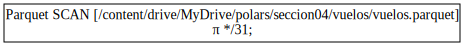

In [ ]:
vuelos_lf.show_graph()

In [ ]:
vuelos_lf.group_by('AIRLINE').agg(
    pl.col('AIR_TIME').mean().name.suffix('_MEAN'), ## columna tiempo en el aire y nueva columna y un sufijo
     pl.col('AIR_TIME').count().alias('COUNT_AIR_TIME'),## englobo la agregacion columna tiempo en el aire, conteo y renombrarla
     SUM_DELAY=pl.col('DEPARTURE_DELAY').sum()  ## nombre de la columna = AGREGACI0N suma de retrasos
).collect() ## para ejecutar y obtener el resultado

AIRLINE,AIR_TIME_MEAN,COUNT_AIR_TIME,SUM_DELAY
str,f64,u32,i32
"""US""",125.774234,194223,1196447
"""UA""",164.835886,507762,7355348
"""B6""",143.858492,262042,3026467
"""WN""",103.100485,1242403,13186520
"""MQ""",66.97963,278791,2837908
…,…,…,…
"""VX""",182.630796,61248,553852
"""DL""",115.665353,870275,6427294
"""NK""",132.347886,115193,1840887


## LECTURA 37

In [ ]:
vuelos_lf = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')

)
tarjetas_lz = pl.LazyFrame({'tarjeta': ['bronce','plata','oro']})
descuentos_lz = pl.LazyFrame({'descuento': [10,20,30]})

In [ ]:
vuelos_lf

In [ ]:
tarjetas_lz

In [ ]:
descuentos_lz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
vuelos_lf.bottom_k(20,by='DEPARTURE_TIME', descending=True).collect()  ## null_last no funciona ordenamos por departue time y descdenciente

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,2,1,7,"""AA""",2200,"""N3BSAA""","""MIA""","""MCO""",2349,2400,11,19,19,60,68,40,192,59,9,49,108,19,0,0,null,8,0,11,0,0
2015,1,2,5,"""B6""",333,"""N529JB""","""MCO""","""SJU""",2355,2400,5,17,17,161,161,140,1189,337,4,336,341,5,0,0,null,null,null,null,null,null
2015,1,2,5,"""B6""",745,"""N556JB""","""JFK""","""PSE""",2359,2400,1,21,21,227,219,187,1617,428,11,446,439,-7,0,0,null,null,null,null,null,null
2015,1,3,6,"""EV""",4629,"""N21130""","""RIC""","""IAH""",1759,2400,361,10,10,206,216,201,1157,231,5,2025,236,371,0,0,null,10,0,361,0,0
2015,1,4,7,"""EV""",4513,"""N14993""","""CLE""","""ORD""",1950,2400,250,11,11,92,87,66,315,17,10,2022,27,245,0,0,null,0,0,0,0,245
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,1,11,7,"""US""",1774,"""N123UW""","""CLT""","""DTW""",2219,2400,101,18,18,99,94,69,500,127,7,2358,134,96,0,0,null,0,0,96,0,0
2015,1,11,7,"""NK""",371,"""N632NK""","""FLL""","""BQN""",2355,2400,5,12,12,141,138,120,983,312,6,316,318,2,0,0,null,null,null,null,null,null
2015,1,12,1,"""AA""",2400,"""N3FMAA""","""LAX""","""DFW""",5,2400,-5,31,31,169,178,143,1235,454,4,454,458,4,0,0,null,null,null,null,null,null


##tomamos la variable de vuelos lazyframe, agrupamos por aerolinea, agregaciones una pór una y renombrar nombre de columna

In [ ]:
vuelos_lf.group_by('AIRLINE').agg(
    pl.col('AIR_TIME').mean().name.suffix('_MEAN'), ## columna tiempo en el aire y nueva columna y un sufijo
     pl.col('AIR_TIME').count().alias('COUNT_AIR_TIME'),## englobo la agregacion columna tiempo en el aire, conteo y renombrarla
     SUM_DELAY=pl.col('DEPARTURE_DELAY').sum()  ## nombre de la columna = AGREGACI0N suma de retrasos
).collect() ## para ejecutar y obtener el resultado

AIRLINE,AIR_TIME_MEAN,COUNT_AIR_TIME,SUM_DELAY
str,f64,u32,i32
"""EV""",72.763842,554752,4857338
"""B6""",143.858492,262042,3026467
"""OO""",75.65501,576814,4517510
"""AS""",157.844784,171439,306997
"""AA""",139.806208,712935,6369435
…,…,…,…
"""MQ""",66.97963,278791,2837908
"""UA""",164.835886,507762,7355348
"""US""",125.774234,194223,1196447


In [ ]:
vuelos_lf.drop('YEAR','MONTH','DAY').collect()  ## eliminar las columnas con .drop

DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [ ]:
vuelos_lf.columns

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

##podemos fitrar un lazy frame

In [ ]:
vuelos_lf.filter((pl.col('MONTH') > 6) & (pl.col('DEPARTURE_DELAY')> 0)).select(
  pl.col('MONTH'),
  pl.col('DEPARTURE_DELAY')
).collect()

MONTH,DEPARTURE_DELAY
i32,i32
7,38
7,48
7,9
7,7
7,20
…,…
12,159
12,16
12,7


In [ ]:
descuentos_lz.collect()

descuento
i64
10
20
30


In [ ]:
tarjetas_lz.with_context(descuentos_lz).select(  ## with context permite acceder a columnas de contexto externo al grafico de calculo accedea columnas de dataframe que no sean este
    pl.col('tarjeta'),  ### queremos crear un nuevo lazy frame con columnas diferentes, en una misma consulta sin necesidad de join
    pl.col('descuento')
).collect()

tarjeta,descuento
str,i64
"""bronce""",10
"""plata""",20
"""oro""",30


In [ ]:
vuelos_lf.slice(1,10).collect()  ## nos permite obtener una porcion o un slice tenemos que proporcionarle de donde a donde fila 1 a fila 10

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",806,"""N3730B""","""SFO""","""MSP""",25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,null,null,null,null,null,null
2015,1,1,4,"""NK""",612,"""N635NK""","""LAS""","""MSP""",25,19,-6,11,30,181,170,154,1299,504,5,526,509,-17,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",2013,"""N584UW""","""LAX""","""CLT""",30,44,14,13,57,273,249,228,2125,745,8,803,753,-10,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",1112,"""N3LAAA""","""SFO""","""DFW""",30,19,-11,17,36,195,193,173,1464,529,3,545,532,-13,0,0,null,null,null,null,null,null
2015,1,1,4,"""DL""",1173,"""N826DN""","""LAS""","""ATL""",30,33,3,12,45,221,203,186,1747,651,5,711,656,-15,0,0,null,null,null,null,null,null


###Graficos

https://hvplot.holoviz.org/#


In [ ]:
! pip install hvplot

In [ ]:
import hvplot.polars  # noqa
import polars as pl

In [ ]:
from bokeh.sampledata.sprint import sprint as df



In [ ]:
df = vuelos_lf

In [ ]:
boxplot = df.hvplot.box(y='YEAR', by='DAY', height=400, width=400, legend=False)
boxplot

:BoxWhisker   [DAY]   (YEAR)

In [ ]:
df6 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'juan', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,54], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, 3500, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,450, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
df6.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""juan""",32,3500,400
5,"""juana""",33,4000,450
6,"""oscar""",54,5000,500


In [ ]:
df6.hvplot.area(
    x='edad', y='ingreso',
    label='edad vs ingreso',
    ylim=(0, 100), width=500, height=400, bgcolor='goldenrod',
)

:Area   [edad]   (ingreso)

In [ ]:
df6.hvplot.bar(x="ingreso", y="aportes", color="gold", title="Aportes vs Ingresos", ylabel="⭐")



:Bars   [ingreso]   (aportes)

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df6

In [ ]:
# ##df6.hvplot.barh('ingreso', 'aportes', by='origin', stacked=True,
# legend='bottom_right', height=600) NO FUE IMPLEMENTADO

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df6

In [ ]:
!pip install hvplot
import hvplot.pandas
from bokeh.sampledata.autompg import autompg_clean as df6



In [ ]:
from bokeh.sampledata.sprint import sprint as df

In [ ]:
##boxplot = df6.hvplot.box(y='ingreso', by='edad', height=400, width=400, legend=False)
###boxplot

In [ ]:
##df6.hvplot.scatter(y='ingreso', ylabel='ingreso') * df6.hvplot.errorbars(y='mean', yerr1='std')

In [ ]:
###df6.hvplot.heatmap(x='ingreso', y='aportes', C='edad',
        ##          height=500, width=500, colorbar=False)

In [ ]:
###df6.hvplot.hexbin('ingreso', 'aportes', logz=True, clabel='Count',
                 ##height=400, width=500)

In [ ]:
df6

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,North America,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,volkswagen
389,32.0,4,135.0,84,2295,11.6,82,North America,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,North America,ford ranger,ford


In [ ]:
df6.hvplot.hist()

:NdOverlay   [Variable]
   :Histogram   [yr]   (Count)

In [ ]:
df6 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'juan', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,54], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, 3500, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,450, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
df6.hvplot.hist("ingreso")

:Histogram   [ingreso]   (Count)

In [ ]:
df6.hvplot.hist("ingreso", "aportes")

:NdOverlay   [aportes]
   :Histogram   [ingreso]   (Count)

In [ ]:
df6.hvplot.kde()

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [ ]:
df6.hvplot.points(x='ingreso', y='aportes', padding=0.2, hover_cols='all', width=300)

:Points   [ingreso,aportes]   (index,id,nombre,edad)

In [ ]:
df6.hvplot.line(x='nombre', y=['edad', 'ingreso', 'aportes'],
                value_label='% of Degrees Earned by Women', legend='top', height=500, width=620)

:NdOverlay   [Variable]
   :Curve   [nombre]   (% of Degrees Earned by Women)

In [ ]:
df1.collect()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,null,null,null,null,null
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,null,null,null,null,null


In [ ]:


# Read CSV using the raw data URL
df1 = pl.read_csv("https://raw.githubusercontent.com/VINY1958/datasets/main/iris.csv", has_header=True)

In [ ]:
df1

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Virginica"""
6.3,2.5,5.0,1.9,"""Virginica"""
6.5,3.0,5.2,2.0,"""Virginica"""


In [ ]:
###hvplot.plotting.parallel_coordinates(
    ##df1,
    ##class_column='variety',
    ##cols=['sepal.length', 'petal.length', 'petal.width']
##)

In [ ]:
df1.hvplot.scatter(x='sepal.length', y='sepal.width', by='variety',
                  legend='top', height=400, width=400)

:NdOverlay   [variety]
   :Scatter   [sepal.length]   (sepal.width)

In [ ]:
df1.hvplot.scatter(x='sepal.length', y='sepal.width', s='petal.length', scale=5, by='variety',
                  legend='top', height=400, width=600,
                  hover_cols=["variety", "sepal.length", "sepal.width", "petal.width"])

:NdOverlay   [variety]
   :Scatter   [sepal.length]   (sepal.width,petal.length,variety,petal.width)

In [ ]:
import numpy as np
import pandas as pd
from hvplot.plotting import scatter_matrix

In [ ]:
scatter_matrix(df1, alpha=0.2)

:GridMatrix   [X,Y]

In [ ]:
df6

In [ ]:
df6 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'juan', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,54], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, 3500, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,450, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
df6.collect()

id,nombre,edad,ingreso,aportes
i64,str,i64,i64,i64
1,"""Rosa""",20,1000,100
2,"""Jose""",25,2000,200
3,"""Pedro""",30,3000,300
4,"""juan""",32,3500,400
5,"""juana""",33,4000,450
6,"""oscar""",54,5000,500


In [ ]:
from bokeh.sampledata.degrees import data as df6

In [ ]:
##df6.hvplot.step(x='edad', y=['nombre', 'ingreso', 'aportes'],
                ##value_label='ingreso vs aportes', legend='top', height=500, width=620)

In [ ]:
###df6.hvplot.table(columns=['edad', 'nombre', 'ingreso', 'aportes'], sortable=True, selectable=True)

In [ ]:
from bokeh.sampledata.degrees import data as df1

In [ ]:
from bokeh.sampledata.sprint import sprint as df1

In [ ]:
df1

,Name,Country,Medal,Time,Year
0,Usain Bolt,JAM,GOLD,9.63,2012
1,Yohan Blake,JAM,SILVER,9.75,2012
2,Justin Gatlin,USA,BRONZE,9.79,2012
3,Usain Bolt,JAM,GOLD,9.69,2008
4,Richard Thompson,TRI,SILVER,9.89,2008
...,...,...,...,...,...
80,Stanley Rowley,AUS,BRONZE,11.20,1900
81,Thomas Burke,USA,GOLD,12.00,1896
82,Fritz Hofmann,GER,SILVER,12.20,1896
83,Alojz Sokol,HUN,BRONZE,12.60,1896


In [ ]:

# Read CSV using the raw data URL
df1 = pl.read_csv("https://raw.githubusercontent.com/VINY1958/datasets/main/iris.csv", has_header=True)

In [ ]:
df1

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Virginica"""
6.3,2.5,5.0,1.9,"""Virginica"""
6.5,3.0,5.2,2.0,"""Virginica"""


In [ ]:
df1.hvplot.violin(y='sepal.length', by='sepal.width', c='petal.lenght', ylabel='iris',
                 cmap=['gold', 'silver', 'brown','blue'], legend=False,
                 width=500, height=500, padding=0.4)

:Violin   [sepal.width]   (sepal.length)

In [ ]:
df1

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""Virginica"""
6.3,2.5,5.0,1.9,"""Virginica"""
6.5,3.0,5.2,2.0,"""Virginica"""


In [ ]:
df6

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,23.9,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,40.5
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,9.4,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


In [ ]:
df1

In [ ]:
df6 = pl.LazyFrame(
  {
        'id':[1,2,3, 4,5,6],
        'nombre':['Rosa','Jose','Pedro', 'juan', 'juana', 'oscar'],
        'edad':[20,25,30, 32, 33,54], # Change 'null' to None for missing values
        'ingreso': [1000,2000,3000, 3500, 4000, 5000], # Change 'null' to None for missing values
        'aportes': [100,200,300,400,450, 500] # Change 'null' to None for missing values
    }
)

In [ ]:
df6.hvplot.bar(y='edad', by='ingreso', height=500, title="edad vs ingreso")

:Bars   [index,ingreso]   (edad)

In [ ]:
df6.hvplot.bar(y='edad', by='aportes', height=500, title="edad vs aportes")

:Bars   [index,aportes]   (edad)

In [ ]:
df6.hvplot.hist()

:NdOverlay   [Variable]
   :Histogram   [aportes]   (Count)

In [ ]:
df1.hvplot.hist()

:NdOverlay   [Variable]
   :Histogram   [petal.width]   (Count)

In [ ]:
df1.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
df6.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:
df1.hvplot.violin(y='sepal.length', by='sepal.width', color='lat', cmap='Category20', title="iris")


:Violin   [sepal.width]   (sepal.length)

In [ ]:
df6.hvplot.violin(y='edad', by='ingreso', color='lat', cmap='Category20', title="iris")

:Violin   [ingreso]   (edad)

https://hvplot.holoviz.org/user_guide/index.html


### lectura 38


In [ ]:
import polars as pl
from polars import col

In [ ]:
vuelos_lz = (
    pl.scan_parquet('/content/drive/MyDrive/polars/seccion04/vuelos/vuelos.parquet')
)
def fill_null_int_str(data, col_name):

    if str(data.select(col_name).dtypes[0]) == 'String':  ## columna tipo string
           return data.fill_null('LOST')  ## rellena con lost
    else:
           return data.fill_null(-999) ### rellenar con -999 como se comporta pipe

In [ ]:
vuelos_lz.collect().head(3)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null


In [ ]:
169/60

2.816666666666667

In [ ]:
263/60

4.383333333333334

In [ ]:
266/60

4.433333333333334

In [ ]:
-11/60

-0.18333333333333332

In [ ]:
vuelos_lz.select(
    pl.col('AIR_TIME'),## tiempo en el aire
    pl.col('DEPARTURE_DELAY')  ## retrasos en las salidas
).map_batches(lambda c: (c/60).cast(pl.Int32)).collect() ## aplica una funcion personalizada a un  dataframe de polars
# ## funcion lambda columna y divida por 60, aplico .castee el tipo de dato
# polars int32, y .collect y observamos

AIR_TIME,DEPARTURE_DELAY
i32,i32
2,0
4,0
4,0
4,0
3,0
…,…
4,0
3,0
3,0


In [ ]:
vuelos_lz.columns

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

# **Nombre de la funcion que se creo luego los parametros de la funcion, luego nombre de columna.collect()**

In [ ]:
vuelos_lz.pipe(fill_null_int_str,'WEATHER_DELAY').collect() # Changed 'WHEATER_DELAY' to 'WEATHER_DELAY'  ## pipe -primer parametro secuencia de funciones del usuario

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i32,i32,i32,i32,str,i32,str,str,str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,i32,i32,i32,i32
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,-999,-999,-999,-999,-999
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,-999,-999,-999,-999,-999
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2015,12,31,4,"""B6""",688,"""N657JB""","""LAX""","""BOS""",2359,2355,-4,22,17,320,298,272,2611,749,4,819,753,-26,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",745,"""N828JB""","""JFK""","""PSE""",2359,2355,-4,17,12,227,215,195,1617,427,3,446,430,-16,0,0,null,-999,-999,-999,-999,-999
2015,12,31,4,"""B6""",1503,"""N913JB""","""JFK""","""SJU""",2359,2350,-9,17,7,221,222,197,1598,424,8,440,432,-8,0,0,null,-999,-999,-999,-999,-999


In [ ]:
vuelos_lz.pipe(fill_null_int_str,'CANCELLATION_REASON').collect() ## APLICAMOS funcion pipe y es str Lost

# **APLICAMOS PIPE CON CUALQUIER FUNCION QUE QUERRAMOS APLICAR**

In [ ]:
vuelos_lz.pipe(fill_null_int_str,'WEATHER_DELAY').collect() ## APLICAMOS funcion pipe y es NUMERICA -999

In [ ]:
query_pf = vuelos_lz.group_by('AIR_TIME').agg(
    SUM_AIR_TIME = pl.col('AIR_TIME').sum()  ## suma del tiempo en el aire
    ).sort('SUM_AIR_TIME', descending=True)

NameError: name 'vuelos_lz' is not defined

LA funcion profile es el perfilamiento del lazy Frame, ejecutar la consulta devuelve una tupla un dataframe con informacion del perfil e informacion de cada nodo , las undiades de tiempo es en microsegundos

In [ ]:
query_pf.profile(show_plot=True)  ## mostrar un diagrama de gantt del resultado del perfilado que vamos a tener, cuanto tiempo a tomado y la duracion en microsegundos

# **Podemos guardar el archivo de serializacion de la consulta**

In [ ]:
query_pf.serialize('./output.txt')  ## las funciones serialize permiten serializar el lazy frame

a continuacion deserializamos y utilizamos la consulta y no compartirlo en polars

In [ ]:
import io

with open('output.txt','rb') as file_object:
      data = file_object.read()  ## lea el file anterior
query = io.BytesIO(data) ## construir la query a partir de a consulta

pl.LazyFrame.deserialize(query).collect() # Changed 'desearialize' to 'deserialize'